# **Projek Akhir Analisis Data**
**Nama**  : Azhar Fikri H.

**Email**   :  afharyodwiseno@gmail.com

**ID Dicoding** : afharyo

# Menentukan Pertanyaan Bisnis Atau Analisis

* 1. Kota manakah dengan total pembelian terbesar di platform Olist pada tahun 2018 ?
* 2. bagaimana tren aktivitas pembelian barang pada tahun 2017 dari bulan ke bulan ?




## Import Semua Packages/Library yang Digunakan

import library yang akan membantu dalam mengelola data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt


## Data Wrangling




### Gathering Data

Mengumpulkan dataset yang akan digunakan

In [4]:
customers = pd.read_csv("./data/olist_customers_dataset.csv") # customer dataset
orders = pd.read_csv("./data/olist_orders_dataset.csv") # orders dataset
orders_payments = pd.read_csv("./data/olist_order_payments_dataset.csv") # order_payments dataset


Cek dataset customers

In [5]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Cek dataset orders

In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,10/3/2016 22:31,10/4/2016 10:19,10/8/2016 10:34,10/14/2016 16:08,11/23/2016 0:00
1,36989eb07a0de2d3d3129eea35553875,aadd27185177fc7ac9b364898ac09343,delivered,10/4/2016 13:11,10/4/2016 13:46,10/8/2016 13:46,10/11/2016 13:46,12/6/2016 0:00
2,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,10/4/2016 14:13,10/4/2016 14:46,10/8/2016 14:46,10/11/2016 14:46,11/30/2016 0:00
3,fbbc9a4fa88f1ccd651790df665b3e57,eba930c3950c6964961c7c72f7f6a461,delivered,10/4/2016 13:30,10/5/2016 2:45,10/9/2016 2:45,10/28/2016 17:05,12/2/2016 0:00
4,bcbc0973414b1dd97555e6f8e9713cfa,3f6f000d5b0a959f38481fad4ab7cac2,delivered,10/4/2016 23:59,10/5/2016 3:45,10/9/2016 3:45,10/16/2016 10:41,11/28/2016 0:00


Cek dataset order payments

In [7]:
orders_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08
1,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88
2,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31
3,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21
4,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66


### Assessing Data

#### Missing Value

In [8]:
print("Jumlah nilai kosong pada dataset \"customers\"")
customers.isnull().sum()

Jumlah nilai kosong pada dataset "customers"


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [9]:
print("Jumlah nilai kosong pada dataset \"orders\"")
orders.isnull().sum()

Jumlah nilai kosong pada dataset "orders"


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Supaya hasil pengolahan data valid, data tanggal yang kosong akan dihapus

In [10]:
print("Jumlah nilai kosong pada dataset \"orders_payments\"")
orders_payments.isnull().sum()

Jumlah nilai kosong pada dataset "orders_payments"


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

#### Duplicate Value

In [11]:
print("Jumlah nilai ganda pada dataset \"customers\"")
customers.duplicated().sum()

Jumlah nilai ganda pada dataset "customers"


0

In [12]:
print("Jumlah nilai ganda pada dataset \"orders\"")
orders.duplicated().sum()

Jumlah nilai ganda pada dataset "orders"


0

In [13]:
print("Jumlah nilai ganda pada dataset \"orders_payments\"")
orders_payments.duplicated().sum()

Jumlah nilai ganda pada dataset "orders_payments"


0

### Cleaning Data

Membersihkan nilai kosong pada variable tanggal pada dataset orders

In [14]:
orders.dropna(axis=0, inplace=True)

In [15]:
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

## Merge Data

Menggabungkan dataset

In [16]:
df_merge = pd.merge(customers, orders, on='customer_id', how='right')
df_merge = pd.merge(df_merge, orders_payments, on='order_id', how='inner')


Cek nilai kosong df_merge

In [17]:
print("Jumlah nilai kosong pada dataset \"df_merge\"")
df_merge.isnull().sum()

Jumlah nilai kosong pada dataset "df_merge"


customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

Cek nilai duplicate df_merge

In [18]:
print("Jumlah nilai ganda pada dataset \"df_merge\"")
df_merge.duplicated().sum()

Jumlah nilai ganda pada dataset "df_merge"


0

## Exploratory Data Analysis
df_merge.to_csv('/content/drive/My Drive/.csv', index=False)

In [19]:
customers.info()
customers.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [20]:
orders.info()
orders.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 97657
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,86341,49451,61005,75637,445
top,cd3b8574c82b42fc8129f6d502690c3e,7812fcebfc5e8065d31e1bb5f0017dae,delivered,8/2/2018 12:06,1/10/2018 10:32,5/9/2018 15:48,5/21/2018 19:28,12/20/2017 0:00
freq,1,1,96455,28,108,47,7,507


In [21]:
orders_payments.info()
orders_payments.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Menghilangkan format waktu pada setiap variable dengan nilai tanggal

In [22]:
df_merge["order_purchase_timestamp"] = pd.to_datetime(df_merge["order_purchase_timestamp"]).dt.date
df_merge["order_approved_at"] = pd.to_datetime(df_merge["order_approved_at"]).dt.date
df_merge["order_delivered_carrier_date"] = pd.to_datetime(df_merge["order_delivered_carrier_date"]).dt.date
df_merge["order_delivered_customer_date"] = pd.to_datetime(df_merge["order_delivered_customer_date"]).dt.date
df_merge["order_estimated_delivery_date"] = pd.to_datetime(df_merge["order_estimated_delivery_date"]).dt.date


Cek struktur data df_merge

In [23]:
df_merge.info()
df_merge.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100739 entries, 0 to 100738
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    100739 non-null  object 
 1   customer_unique_id             100739 non-null  object 
 2   customer_zip_code_prefix       100739 non-null  int64  
 3   customer_city                  100739 non-null  object 
 4   customer_state                 100739 non-null  object 
 5   order_id                       100739 non-null  object 
 6   order_status                   100739 non-null  object 
 7   order_purchase_timestamp       100739 non-null  object 
 8   order_approved_at              100739 non-null  object 
 9   order_delivered_carrier_date   100739 non-null  object 
 10  order_delivered_customer_date  100739 non-null  object 
 11  order_estimated_delivery_date  100739 non-null  object 
 12  payment_sequential            

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,100739.000000,100739.000000,100739.000000,100739.000000
mean,35126.620356,1.088387,2.851894,153.065673
std,29779.959615,0.652783,2.684496,214.465614
min,1003.000000,1.000000,0.000000,0.000000
25%,11385.000000,1.000000,1.000000,56.780000
50%,24421.000000,1.000000,1.000000,100.000000
75%,58702.000000,1.000000,4.000000,171.290000
max,99980.000000,26.000000,24.000000,13664.080000


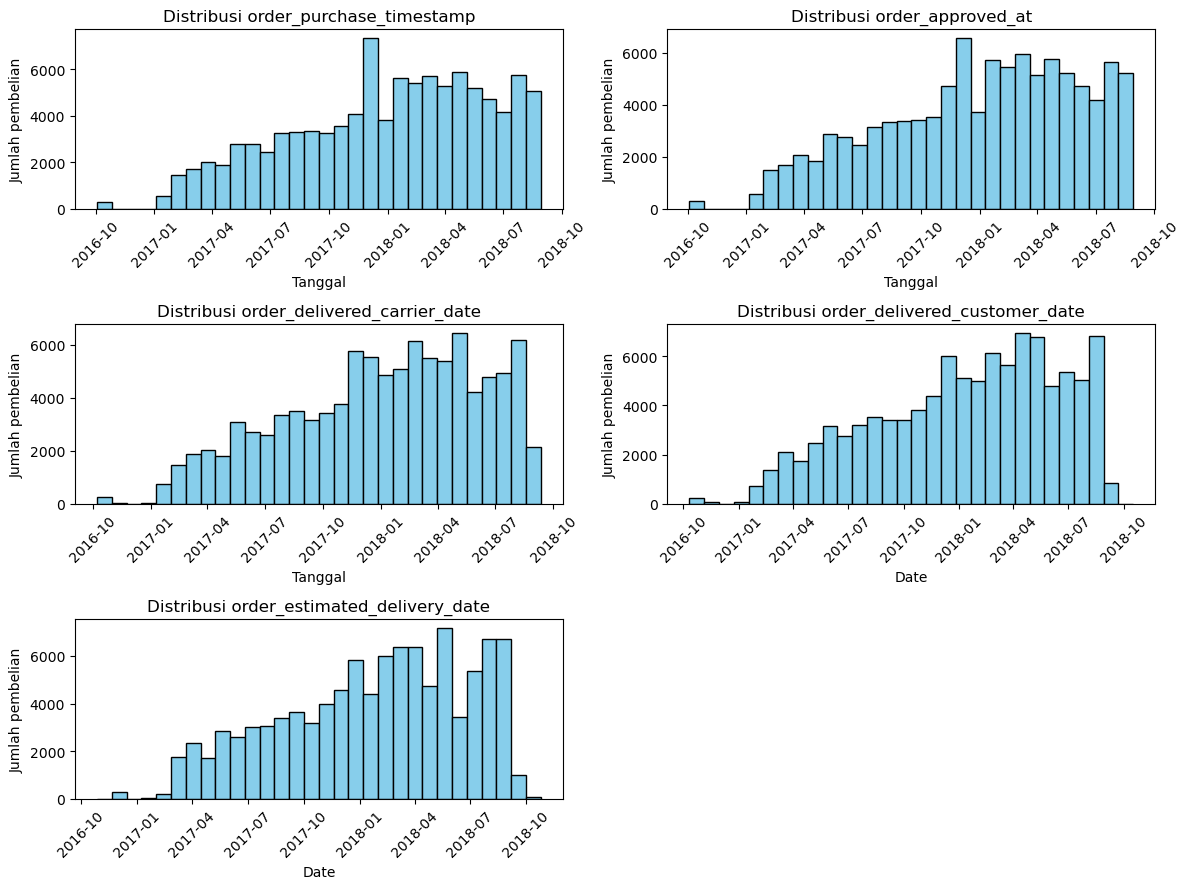

In [24]:
plt.figure(figsize=(12, 9))

plt.subplot(3,2,1)
plt.hist(df_merge["order_purchase_timestamp"], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi order_purchase_timestamp')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah pembelian')
plt.xticks(rotation=45)

plt.subplot(3,2,2)
plt.hist(df_merge["order_approved_at"], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi order_approved_at')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah pembelian')
plt.xticks(rotation=45)

plt.subplot(3,2,3)
plt.hist(df_merge["order_delivered_carrier_date"], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi order_delivered_carrier_date')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah pembelian')
plt.xticks(rotation=45)

plt.subplot(3,2,4)
plt.hist(df_merge["order_delivered_customer_date"], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi order_delivered_customer_date')
plt.xlabel('Date')
plt.ylabel('Jumlah pembelian')
plt.xticks(rotation=45)

plt.subplot(3,2,5)
plt.hist(df_merge["order_estimated_delivery_date"], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi order_estimated_delivery_date')
plt.xlabel('Date')
plt.ylabel('Jumlah pembelian')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

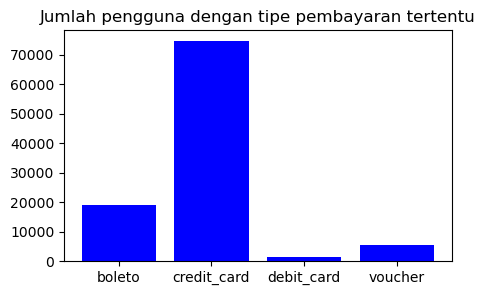

In [25]:
count_payment_type = df_merge['payment_type'].value_counts().reindex(['boleto', 'credit_card', 'debit_card', 'voucher'], fill_value=0)

x = []
y = []

for payment_type, count in count_payment_type.items():
  x.append(payment_type)
  y.append(count)

plt.figure(figsize=(5, 3))
plt.bar(x, y, color = "blue")
plt.title("Jumlah pengguna dengan tipe pembayaran tertentu")
plt.show()


## Export Clean Dataset to CSV

In [26]:
df_merge.to_csv('./all_data.csv', index=False)

## Visualisasi Data

### Pertanyaan 1: Kota manakah dengan total pembelian terbesar di platform Olist pada tahun 2018 ?

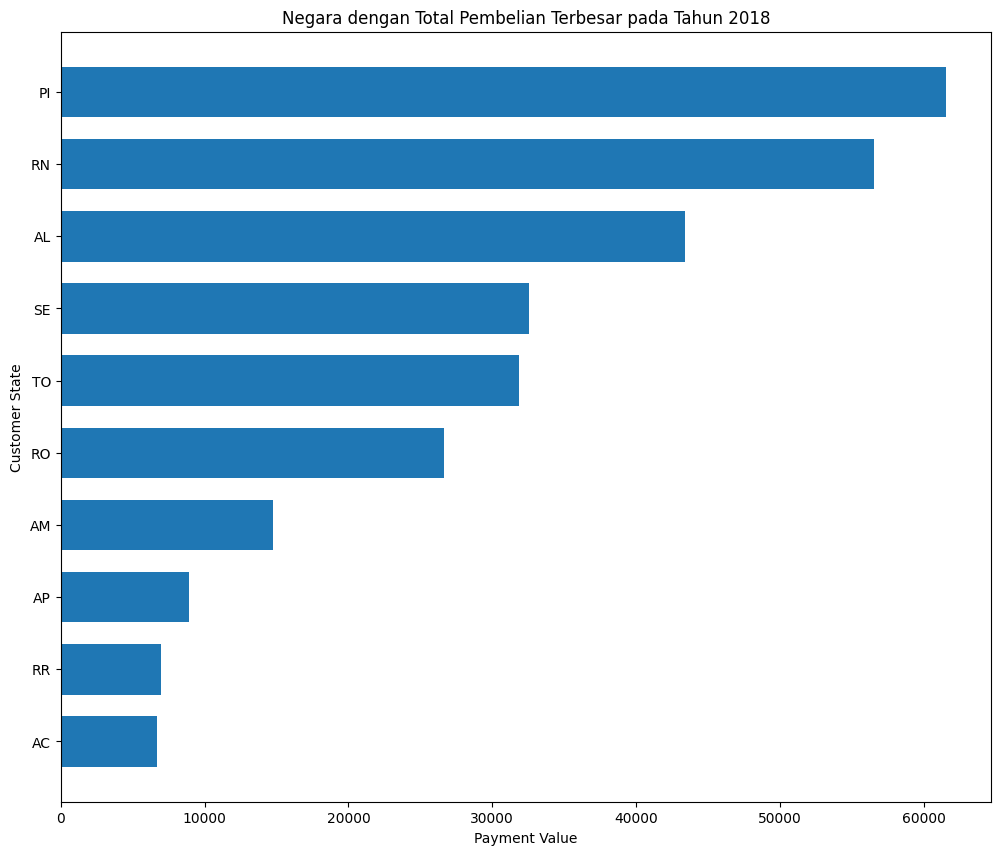

In [23]:
df_merge['order_approved_at'] = pd.to_datetime(df_merge['order_approved_at'])

df1 = df_merge[df_merge['order_approved_at'].dt.year == 2018]
df1 = df1.groupby(['customer_state'])['payment_value'].agg('sum')
df1 = df1.sort_values(ascending=True).head(10)

x = []
y = []

for state, count in df1.items():
  x.append(state)
  y.append(count)



plt.figure(figsize=(12, 10))


plt.barh(x, y, height=0.7)
plt.xlabel("Total Pemebelian")
plt.ylabel("Kota")
plt.title("Negara dengan Total Pembelian Terbesar pada Tahun 2018")
plt.show()

### Pertanyaan 2: Bagaimana tren aktivitas pembelian barang pada tahun 2017 dari bulan ke bulan ?


C:\Users\DELL\AppData\Local\Temp\ipykernel_23788\4113672944.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2_monthly = df2.resample('M', on='order_approved_at').size()


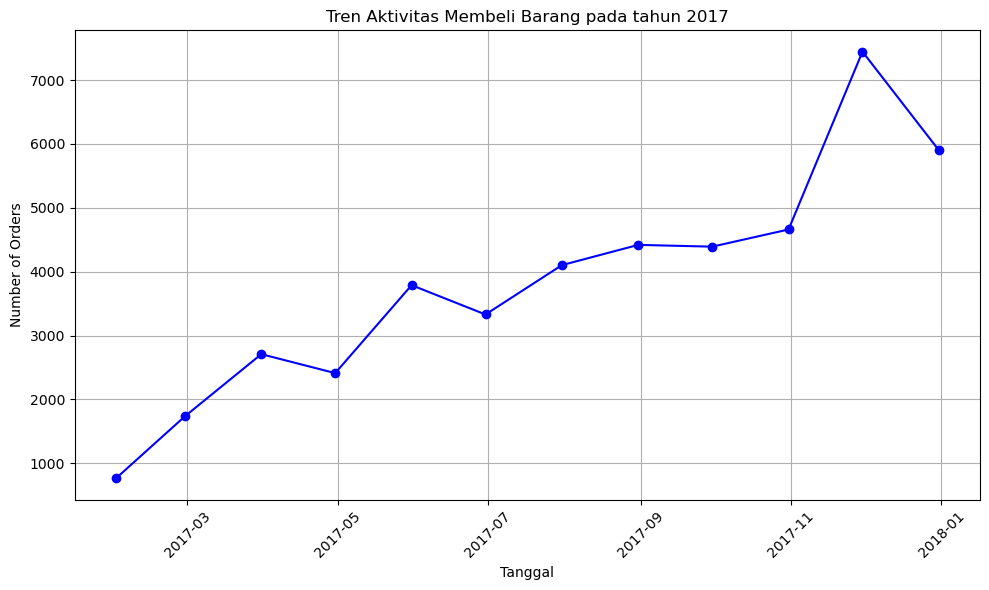

In [27]:
df_merge['order_approved_at'] = pd.to_datetime(df_merge['order_approved_at'])

df2 = df_merge[df_merge['order_approved_at'].dt.year == 2017]
df2_monthly = df2.resample('M', on='order_approved_at').size()

# Plot the data as a line chart
plt.figure(figsize=(10, 6))
plt.plot(df2_monthly.index, df2_monthly.values, marker='o', linestyle='-', color='b')
plt.title("Tren Aktivitas Membeli Barang pada tahun 2017")
plt.xlabel("Tanggal")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Kesimpulan

1. Pada tahun 2018, kota dengan total pembelian terbesar ada di kota Sao Paolo (SP). Kemudian, kota dengan total pembelian terkecil ada di kota Acre (AC) yang jumlahnya berdekatan dengan kota Roraima (RR)

2. Dari bulan ke bulan, platform Olist menunjukkan tren peningkatan dalam halnya jumlah aktivitas pembelian barang pada tahun 2017. Menjelang tahun 2018, aktivitas pembelian sempat mencapai puncaknya.